#  Wine Quality Machine Learning

### Import Modules and Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn
import time
%matplotlib inline

### Import Data

In [129]:
wine_red = pd.read_csv('winequality-red.csv',sep=';')
wine_white = pd.read_csv('winequality-white.csv',sep=';')

### Data Clean-up

In [130]:
# RED WINE DATA

wine_red.drop_duplicates(inplace=True)
#wine_red.dropna(inplace=True)

#No NA's
print('NAs in Red:', wine_red.isna().any().any(),'\n')

# WHITE WINE DATA

wine_white.drop_duplicates(inplace=True)
#wine_white.dropna(inplace=True)

#No NA's
print('NAs in White:', wine_white.isna().any().any())

# Merge White/Red

wines = [wine_red,wine_white]
all_wines = pd.concat(wines, ignore_index=True)

x = []
for element in all_wines.quality:
    if ((element >=0) and (element <5)):
        x.append('poor')
    elif ((element >= 5) and (element<7)):
        x.append('decent')
    else:
        x.append('good')

all_wines['adjusted quality'] = x


NAs in Red: False 

NAs in White: False


### Distributions of Quality Scores

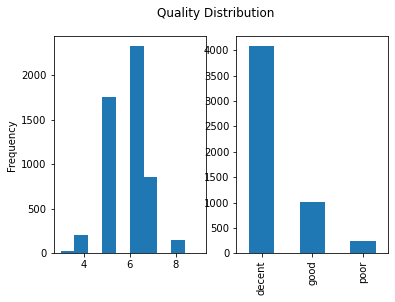

In [131]:
plt.figure()

plt.subplot(121)
all_wines.quality.plot(kind='hist')

plt.subplot(122)
adj_aw_hist = all_wines['adjusted quality'].value_counts()
adj_aw_hist.plot(kind="bar")

plt.suptitle('Quality Distribution')

plt.show()

### Target Features and Arrays

In [133]:
target_qual = all_wines.quality
target_adj_qual = all_wines['adjusted quality']

y=[]
for element in wine_red.quality:
    if ((element >=0) and (element <5)):
        y.append('poor')
    elif ((element >= 5) and (element<7)):
        y.append('decent')
    else:
        y.append('good')

wine_red['adjusted quality'] = y
target_red = wine_red.quality
target_adj_red = wine_red['adjusted quality']
features_red = wine_red.iloc[:,:-2]


z=[]
for element in wine_white.quality:
    if ((element >=0) and (element <5)):
        z.append('poor')
    elif ((element >= 5) and (element<7)):
        z.append('decent')
    else:
        z.append('good')

wine_white['adjusted quality'] = z    
target_white = wine_white.quality
target_adj_white = wine_white['adjusted quality']
features_white = wine_white.iloc[:,:-2]


### Feature Selection

<AxesSubplot:>

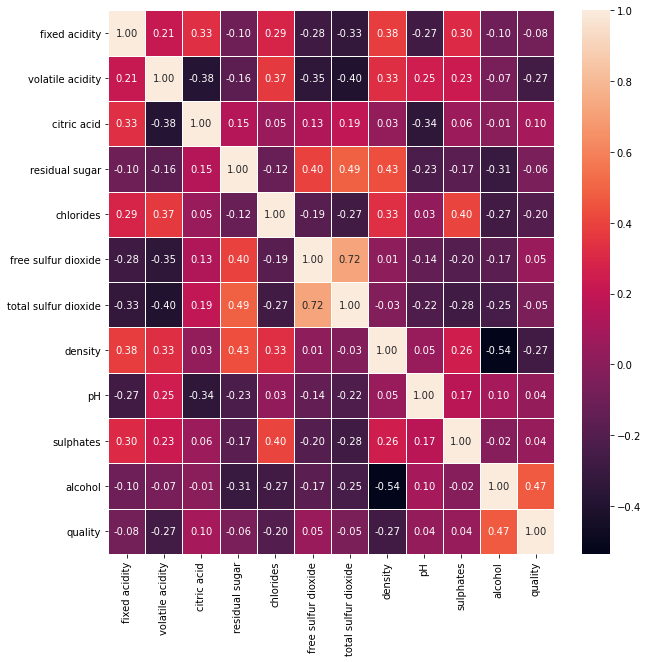

In [134]:
features = all_wines.iloc[:, :-2]

features_selected = []
feature_names = [x for x in features.columns]
for name in feature_names:
    coef,p = kendalltau(features[f'{name}'], target_qual)
    if p < .01:
        features_selected.append(name)
       #print(f'NAME:{name}, COEF:{coef}, P-VAL: {p}','\n')

selected_features = all_wines[features_selected]
selected_features_red = features_red[features_selected]
selected_features_white = features_white[features_selected]

features2 = all_wines.iloc[:, :-1]
corr_matrix = features2.round(2).corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, linewidths=.8,fmt='.2f',ax=ax)



### Logistic Regression

#### All Wines

The (3-9 Scale) LogReg Score for All Wine is: 55.08% 

The (Alt Scale) LogReg Score for All Wine is: 76.69% 
 Time Efficiency: 0.69


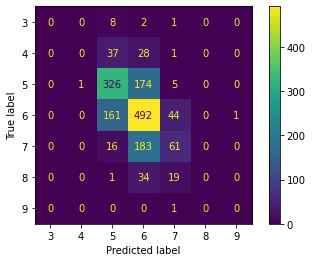

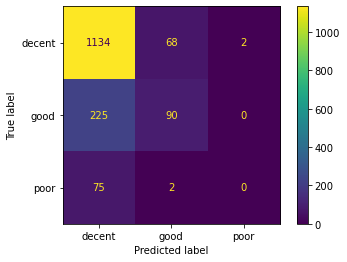

In [135]:
# 3-9 Scale

start_time = time.time() #starts timer

feature_train,feature_test,target_train,target_test = train_test_split(selected_features,
                                                      target_qual,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
pipe.fit(feature_train, target_train)

log_score_sel_qual = pipe.score(feature_test,target_test)

print(f'The (3-9 Scale) LogReg Score for All Wine is: {log_score_sel_qual.round(4)*100}%','\n')



cm_plot = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)


# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features,
                                                      target_adj_qual,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
pipe.fit(feature_train, target_train)

log_score_sel_adj_qual = pipe.score(feature_test,target_test)

end_time = time.time() #ends timer

aw_log_time = end_time-start_time

print(f'The (Alt Scale) LogReg Score for All Wine is: {log_score_sel_adj_qual.round(4)*100}%','\n',f'Time Efficiency: {round(aw_log_time,2)}')


cm_plot_alt = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)



#### Red Wine

In [140]:
# 3-9 Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_red,
                                                      target_red,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
pipe.fit(feature_train, target_train)

log_score_sel_red = pipe.score(feature_test,target_test)

print(f'The (3-9 Scale) LogReg Score for Red Wine is: {log_score_sel_red.round(4)*100}%','\n')

# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_red,
                                                      target_adj_red,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
pipe.fit(feature_train, target_train)

log_score_sel_adj_red = pipe.score(feature_test,target_test)

print(f'The (Alt Scale) LogReg Score for Red Wine is: {log_score_sel_adj_red.round(4)*100}%','\n')


The (3-9 Scale) LogReg Score for Red Wine is: 58.330000000000005% 

The (Alt Scale) LogReg Score for Red Wine is: 85.78% 



#### White Wine

In [137]:
# 3-9 Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_white,
                                                      target_white,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
pipe.fit(feature_train, target_train)

log_score_sel_white = pipe.score(feature_test,target_test)
print(f'The (3-9 Scale) LogReg Score for White Wine is: {log_score_sel_white.round(4)*100}%','\n')


# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_white,
                                                      target_adj_white,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
pipe.fit(feature_train, target_train)

log_score_sel_adj_white = pipe.score(feature_test,target_test)

print(f'The (Alt Scale) LogReg Score for White Wine is: {round(log_score_sel_adj_white,4)*100}%')

The (3-9 Scale) LogReg Score for White Wine is: 53.74% 

The (Alt) LogReg Score for White Wine is: 76.2%


### Random Forest

#### All Wines

In [138]:
# Random Forest #

# All Wines

# 3-9 Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features,
                                                      target_qual,
                                                      test_size=0.3,
                                                      random_state=1111) 

clf=RandomForestClassifier(n_estimators=100)

pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(feature_train, target_train)

rf_sel_qual = pipe.score(feature_test,target_test)

print(f'The (3-9 Scale) Random Forest Score for All Wine is: {round(rf_sel_qual,4)*100}%','\n')

# 'poor','decent','good' Scale

start_time = time.time()

feature_train,feature_test,target_train,target_test = train_test_split(selected_features,
                                                      target_adj_qual,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(feature_train, target_train)

rf_sel_adj_qual = pipe.score(feature_test,target_test)

end_time = time.time() #ends timer
aw_rf_time = end_time-start_time

print(f'The (Alt Scale) Random Forest Score for All Wine is: {round(rf_sel_adj_qual,4)*100}%','\n',f'Time Efficiency: {round(aw_rf_time,2)}')


The (3-9 Scale) Random Forest Score for All Wine is: 56.699999999999996% 

The (Alt Scale) Random Forest Score for All Wine is: 78.95% 
 Time Efficiency: 1.31


#### Red Wine

In [114]:
# Red Wine Only 

# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_red,
                                                      target_adj_red,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(feature_train, target_train)

rf_sel_adj_qual_red = pipe.score(feature_test,target_test)

print(f'The (Alt Scale) Random Forest Score for Red Wine is: {round(rf_sel_adj_qual_red,4)*100}%','\n')


The (Alt Scale) Random Forest Score for Red Wine is: 84.07% 



In [ ]:
#### White Wine

In [115]:
# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_white,
                                                      target_adj_white,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(feature_train, target_train)

rf_sel_adj_qual_white = pipe.score(feature_test,target_test)

print(f'The (Alt Scale) Random Forest Score for White Wine is: {round(rf_sel_adj_qual_white,4)*100}%','\n')

The (Alt Scale) Random Forest Score for White Wine is: 77.8% 



### K-Nearest Neighbors

#### All Wines

In [111]:
# 3-9 Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features,
                                                      target_qual,
                                                      test_size=0.3,
                                                      random_state=1111)

classifier = KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance',p=1, leaf_size=1)
classifier.fit(feature_train,target_train)

target_pred = classifier.predict(feature_test)

KNN_sel_score = accuracy_score(target_test,target_pred)

print(f'The (3-9 Scale) KNN Score for All Wine is: {round(KNN_sel_score,4)*100}%','\n')


# 'poor','decent','good' Scale

start_time = time.time()

feature_train,feature_test,target_train,target_test = train_test_split(selected_features,
                                                      target_adj_qual,
                                                      test_size=0.3,
                                                      random_state=1111)

classifier = KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance',p=1, leaf_size=1)
classifier.fit(feature_train,target_train)

target_pred = classifier.predict(feature_test)

KNN_sel_adj_score = accuracy_score(target_test,target_pred)

end_time = time.time() #ends timer
aw_KNN_time = end_time-start_time

print(f'The (Alt Scale) KNN Score for All Wine is: {round(KNN_sel_adj_score,4)*100}%','\n',f'Time Efficiency: {round(aw_KNN_time,2)}','\n')


The (3-9 Scale) KNN Score for All Wine is: 46.489999999999995% 

The (Alt Scale) KNN Score for All Wine is: 75.75% 
 Time Efficiency: 0.07 



#### Red Wine

In [112]:
feature_train,feature_test,target_train,target_test = train_test_split(selected_features_red,
                                                 target_adj_red,
                                                 test_size=0.3,
                                                 random_state=1111)


classifier = KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance',p=1, leaf_size=1)
classifier.fit(feature_train,target_train)

target_pred = classifier.predict(feature_test)

KNN_sel_adj_score_red = accuracy_score(target_test,target_pred)

print(f'The (Alt Scale) KNN Score for Red Wine is: {round(KNN_sel_adj_score_red,4)*100}%','\n')


The (Alt Scale) KNN Score for Red Wine is: 82.11% 



#### White Wine

In [127]:
feature_train,feature_test,target_train,target_test = train_test_split(selected_features_white,
                                                 target_adj_white,
                                                 test_size=0.3,
                                                 random_state=1111)


classifier = KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance',p=1, leaf_size=1)
classifier.fit(feature_train,target_train)

target_pred = classifier.predict(feature_test)

KNN_sel_adj_score_white = accuracy_score(target_test,target_pred)

print(f'The (Alt Scale) KNN Score for White Wine is: {round(KNN_sel_adj_score_white,4)*100}%','\n')

The (Alt Scale) KNN Score for White Wine is: 73.92999999999999% 



### Comparison of Prediction Accuracies across Model and Wine Color

Figure(432x288)


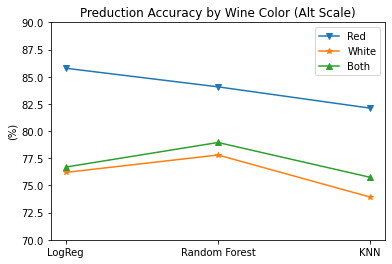

In [182]:
alt_red = [85.78, 84.07, 82.11]
alt_white = [76.2, 77.8, 73.93]
alt_all = [76.69, 78.95, 75.75]

fig, ax = plt.subplots()
ax.plot(['LogReg','Random Forest', 'KNN'], alt_red, marker='v')
ax.plot(alt_white,marker='*')
ax.plot(alt_all, marker='^')
ax.set(title='Preduction Accuracy by Wine Color (Alt Scale)')
ax.set_ylim(70,90)
ax.set_ylabel('(%)')
ax.legend(['Red','White','Both'])

print(fig)

### Comparison of Time Efficiencies

Figure(432x288)


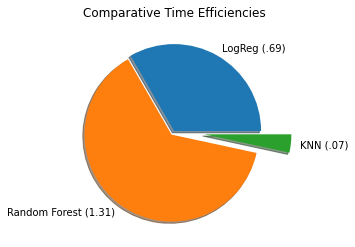

In [201]:
times = [.69, 1.31, .07]

pie, ax = plt.subplots()
ax.pie(times,labels=['LogReg (.69)','Random Forest (1.31)','KNN (.07)'], 
       explode=[0,.05,.35], shadow=True, normalize=True)
ax.set_title('Comparative Time Efficiencies')

print(pie)